# Filosofos
O intuito deste notebook e generalizar a pesquisa de popularidade de grafos dos artistas para uma base de filósofos.


### Funções Básicas
Aqui é colocado as funções básicas, que criam o csv, geram o grafo e fazem uma vizualização de um subgrafo aleatório para fins de verificação do grafo.

In [1]:
from filosofosutils import *

In [2]:
filosofos_network = get_grafo()

In [3]:
df = get_pandas_csv()
df

,filosofo
id,
0,Camille_Moubarak
1,Jürgen_Habermas
2,Carl_Gustav_Hempel
3,Robert_Nozick
4,Peter_Achinstein
...,...
3887,Paul_Bernays
3888,Minna_Specht
3889,"Sir_William_Hamilton,_9th_Baronet__William_Ham..."


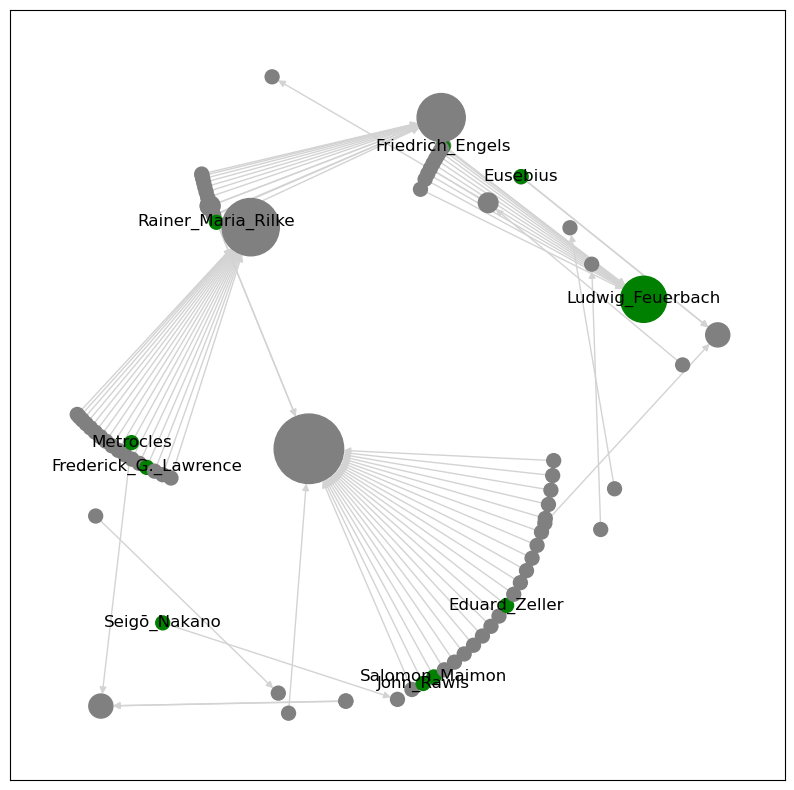

In [10]:
np.random.seed(42)
gera_grafico(grafo=filosofos_network,df=df)

In [5]:
disrupcao = computar_disrupcao(filosofos_network)

### Cálculo da Disrupção
Seguindo algumas análises da parte dos artistas foi cálculado a disrupção do grafo anterior, entretanto, sem muito sucesso.

In [11]:
csv_completo = (disrupcao
                .reset_index()
                .rename(columns={"index": "id"})
                .set_index("id")
                .join(df)
                .sort_index()
                .dropna()
                .sort_values('disruption'))

In [12]:
csv_completo

,ni,nj,nk,disruption,in,out,filosofo
id,,,,,,,
1366,0.0,8.0,12.0,-0.400000,8.0,1.0,Félix_Ravaisson-Mollien
1601,3.0,12.0,11.0,-0.346154,15.0,3.0,Theodor_W._Adorno
272,0.0,5.0,12.0,-0.294118,5.0,2.0,Jean_Cavaillès
352,0.0,5.0,12.0,-0.294118,5.0,2.0,Léon_Brunschvicg
1434,3.0,10.0,12.0,-0.280000,13.0,2.0,Georges_Bataille
...,...,...,...,...,...,...,...
479,22.0,1.0,9.0,0.656250,23.0,6.0,Charles_Taylor_(philosopher)
1270,26.0,0.0,12.0,0.684211,26.0,2.0,Henry_George
493,35.0,1.0,12.0,0.708333,36.0,1.0,John_Ruskin


In [8]:
csv_completo.to_csv('../data/disrupcao_filosofos.csv',index=True)

### Exportação do Grafo

In [9]:
nx.write_edgelist(filosofos_network,'../data/grafo_edges_filosofos.csv', data=False)